In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

plt.style.use('seaborn-whitegrid')

/var/folders/3v/wnjt1q_12gn5lscn_jqcbpy40000gn/T/ipykernel_18765/632996213.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


(100,)
(100,)
(100,)


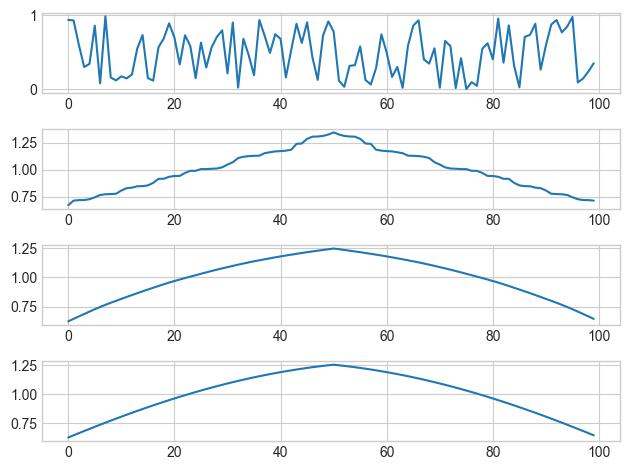

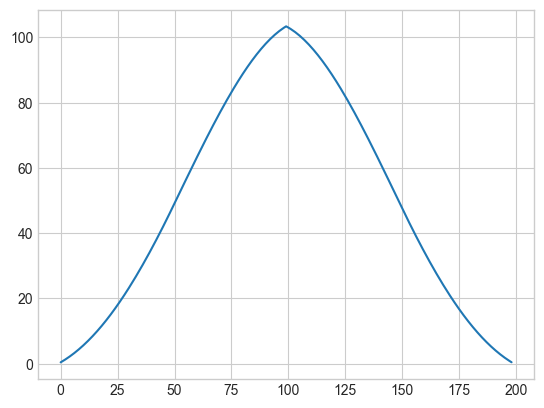

In [11]:
N: int = 100
x = np.random.rand(N)

fig, axs = plt.subplots(4)

axs[0].plot(x)
for i in range(3):
    rev = np.flip(x, axis=0)
    result = []
    for j in range(N):
        s = 0
        for k in range(j):
            s += rev[k] * x[k]

        result.append(s)

    for j in range(N, -1, -1):
        s = 0
        for k in range(j):
            s += rev[k] * x[k]

        result.append(s)

    M = 2 * N
    x = np.array(result[M//4 : (M - M//4)])
    x = x / np.mean(x)
    print(x.shape)
    axs[i+1].plot(x)

plt.tight_layout()
plt.show()

plt.plot(np.convolve(x, x))
plt.show()

In [12]:
N: int = np.random.randint(0, 100)
M: int = np.random.randint(0, 100)
MAX_COEF: int = 123652


def zero_padding(v: np.array):
    temp = np.zeros(N + M - 1 - len(v))
    return np.append(v, temp)

p = np.random.randint(-MAX_COEF, MAX_COEF, size=N)
q = np.random.randint(-MAX_COEF, MAX_COEF, size=M)

r = np.convolve(p, q)

p = zero_padding(p)
q = zero_padding(q)


fr_p = np.fft.fft(p)
fr_q = np.fft.fft(q)

fr_r = fr_p * fr_q

r_2 = np.fft.ifft(fr_r)


error = np.linalg.norm(r - r_2)

print(0 if error < 0.0001 else error)

0.0001066474964375888


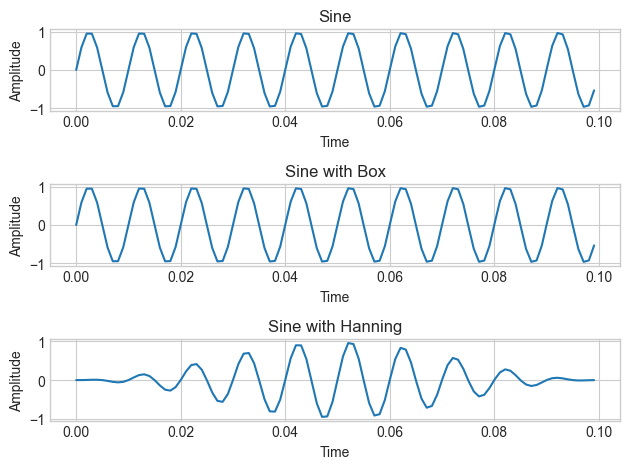

In [13]:
#3

def box_window(dim: int) -> np.array:
    window = dim * [1]
    return np.array(window)

def hanning_window(dim: int):
    n = np.arange(0, dim, 1)
    return .5 * (1 - np.cos(2 * np.pi * n / dim))

f = 100
A = 1
phi = 0

t = np.linspace(0, 1, 1000)

sin = A * np.sin(2 * np.pi * f * t + phi)

fig, axs = plt.subplots(3)

for ax in axs:
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

axs[0].set_title('Sine')
axs[0].plot(t[:100], sin[:100])

axs[1].set_title('Sine with Box')
axs[1].plot(t[:100], sin[:100] * box_window(100))

axs[2].set_title('Sine with Hanning')
axs[2].plot(t[:100], sin[:100] * hanning_window(100))

fig.tight_layout()


In [14]:
#4

#a

'''
Tinand cont ca perioada de esantionare este 1h si trebuie sa iau un semnal corespunzator pentru 3 zile,
este suficient sa iau 24 * 3 = 72 valori
'''

all_data = np.genfromtxt('archive/Train.csv', dtype=[int, 'U19', int], delimiter=',', skip_header=1)

x = all_data[24 : 24 + 72]

x = [elem[2] for elem in x]


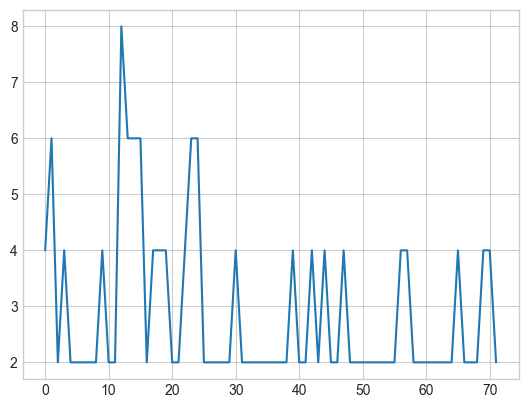

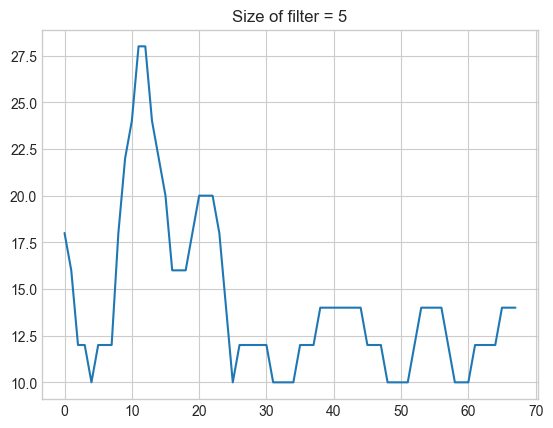

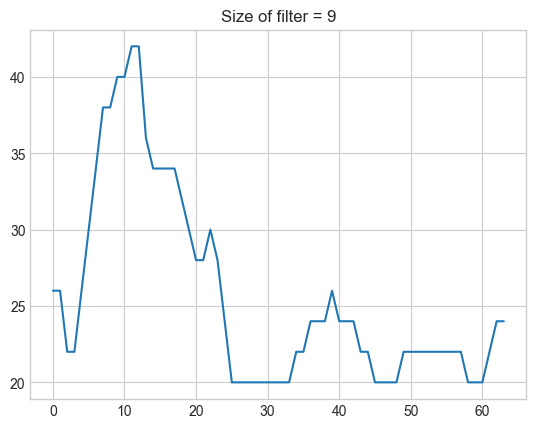

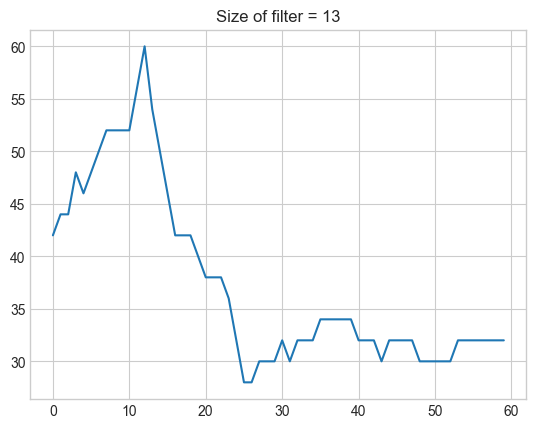

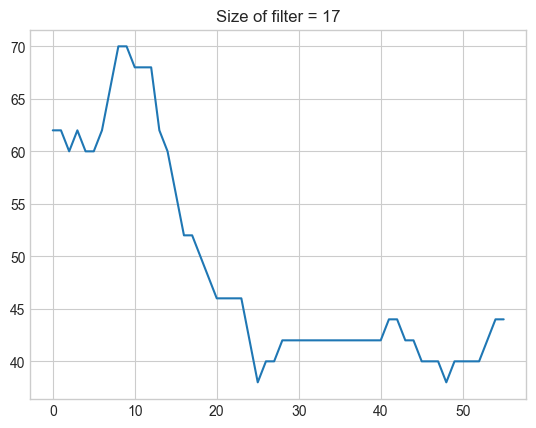

In [15]:
#b
plt.plot(x)
plt.show()
for w in [5, 9, 13, 17]:
    plt.title(f"Size of filter = {w}")
    filtered_signal = np.convolve(x, np.ones(w), 'valid')
    plt.plot(filtered_signal)
    plt.show()

In [64]:
#c

'''
Frecventa Nyquist este 1/2 din frecventa de esantionare. Fs = 1 / (60 * 60) = 1 / 3600 =>
Frecv_nyq = 1/2 * 1/3600 = 1 / 7200

Din cerinta ("Care este valoarea frecvent, ei in Hz si care este valoarea frecventei normalizate intre 0 si 1, unde 1
reprezinta frecventa Nyquist?") se intelege ca frecventa de taiere este maxim frecventa nyquist
'''
f_nyq = 1 / 7200

cut_off = 1 / 7200 * 0.8
normal_cutoff = 0.8

In [70]:
b_butter, a_butter = sig.butter(5, normal_cutoff, btype='low', analog=False)

b_cheby, a_cheby = sig.cheby1(5, rp=5, Wn=normal_cutoff, btype='low', analog=False)


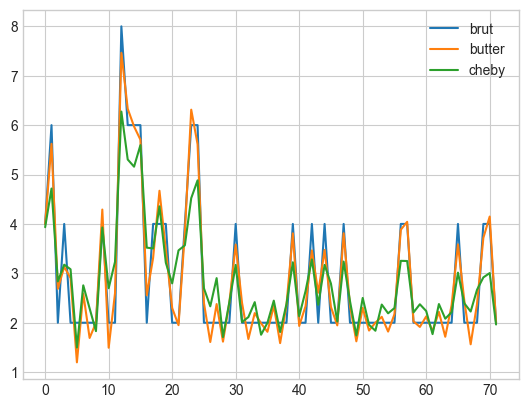

'\nChebyshev - prefer frecventa decat amplitudinea, prefer sa vad can este trafic decat cat de mare a fost traficul\n'

In [72]:
#e - f
x_butter = sig.filtfilt(b_butter, a_butter, x)
x_cheby = sig.filtfilt(b_cheby, a_cheby, x)

plt.plot(x, label='brut')
plt.plot(x_butter, label='butter')
plt.plot(x_cheby, label='cheby')

plt.legend()

plt.show()
'''
Chebyshev - prefer frecventa decat amplitudinea, prefer sa vad can este trafic decat cat de mare a fost traficul
'''

/opt/homebrew/lib/python3.11/site-packages/scipy/signal/_filter_design.py:4359: RuntimeWarning: divide by zero encountered in scalar divide
  mu = 1.0 / N * arcsinh(1 / eps)
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/homebrew/lib/python3.11/site-packages/scipy/signal/_filter_design.py:2746: RuntimeWarning: invalid value encountered in multiply
  p_lp = wo * p


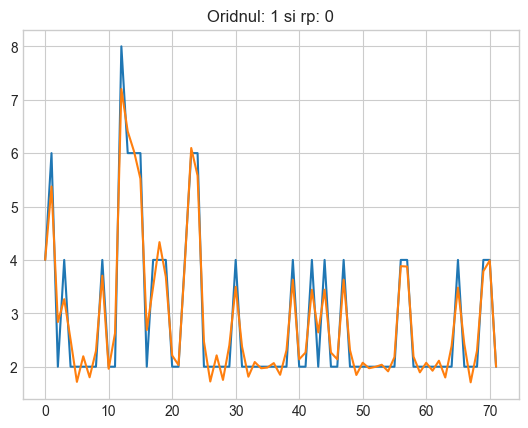

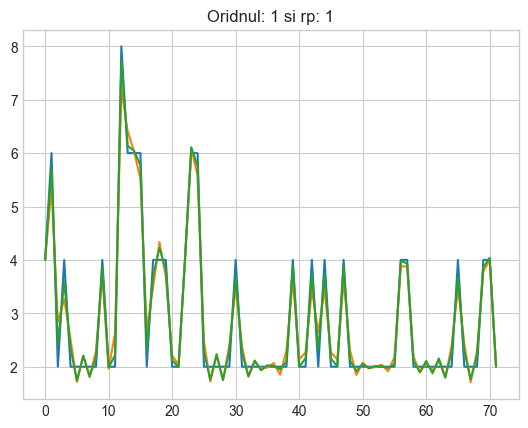

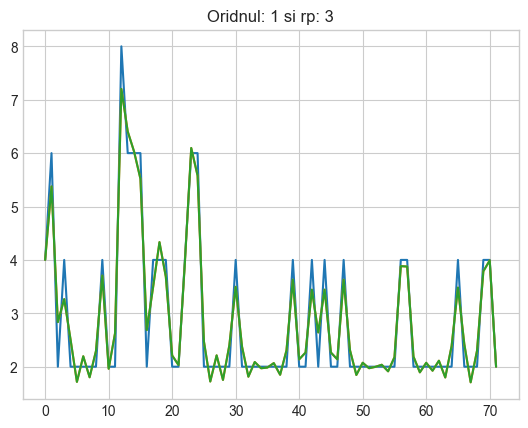

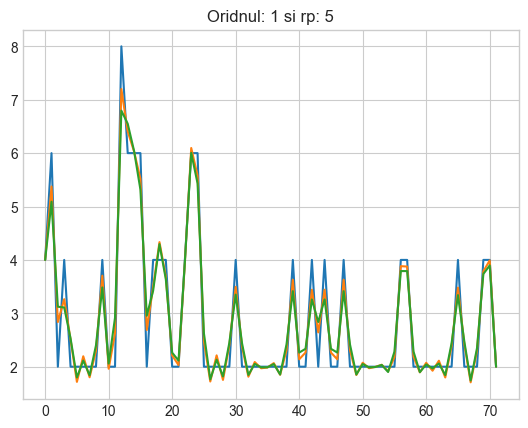

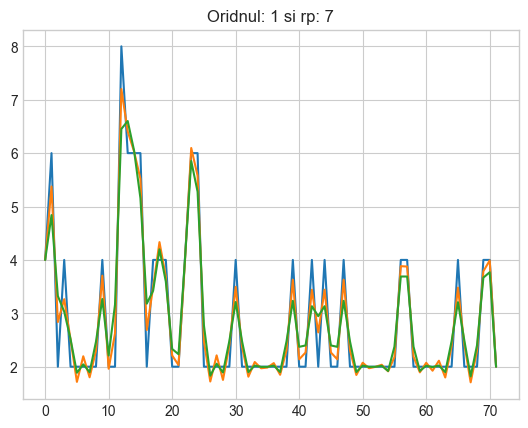

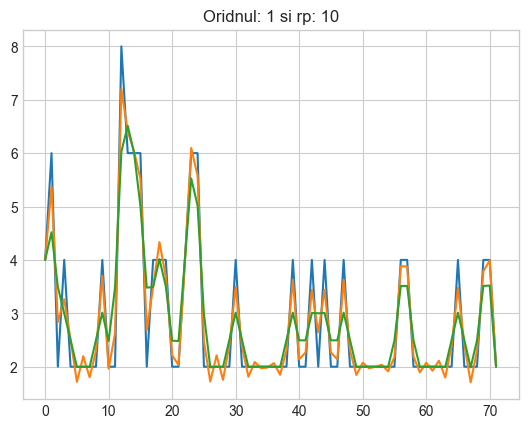

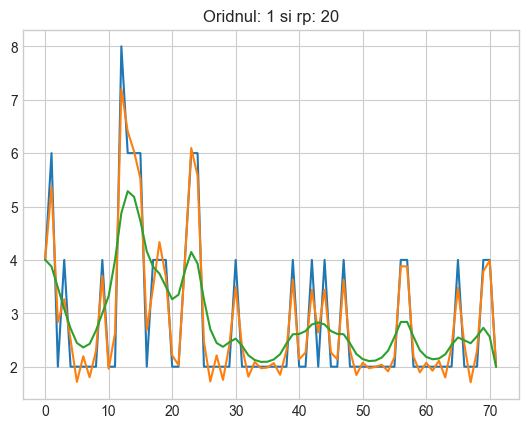

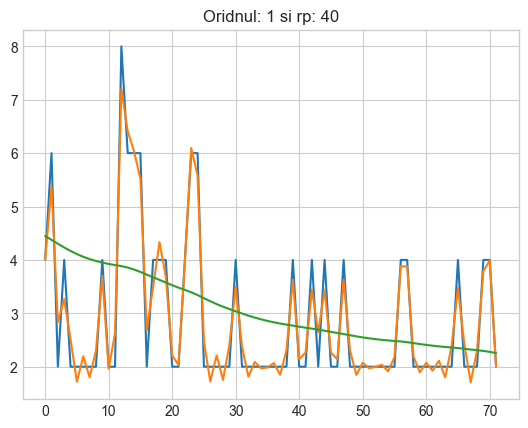

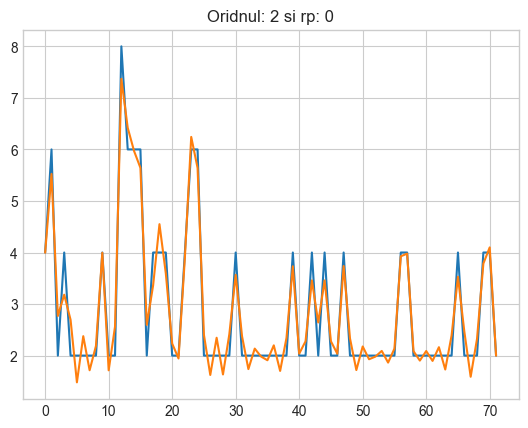

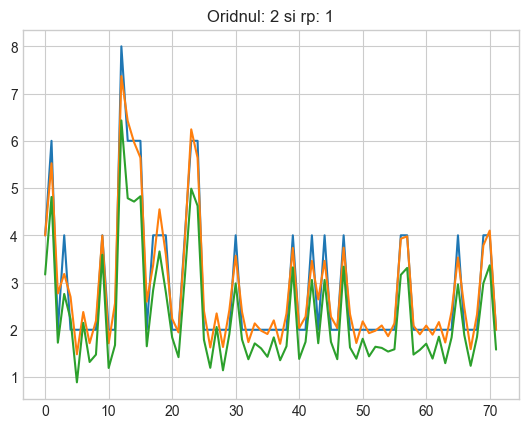

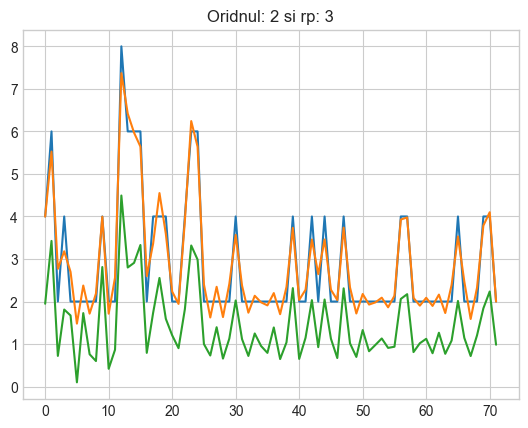

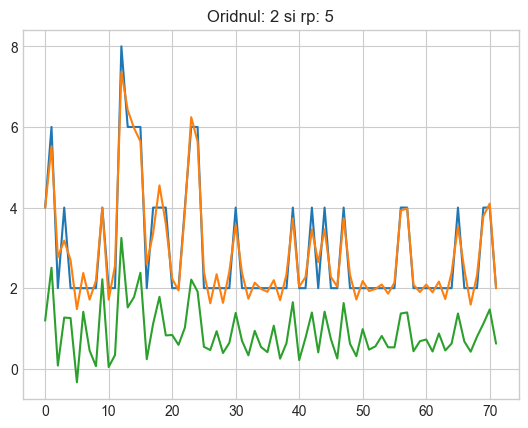

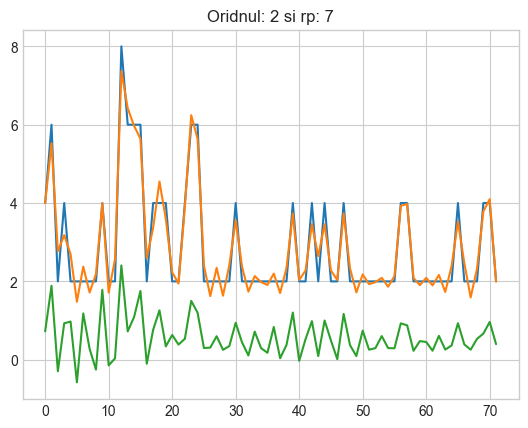

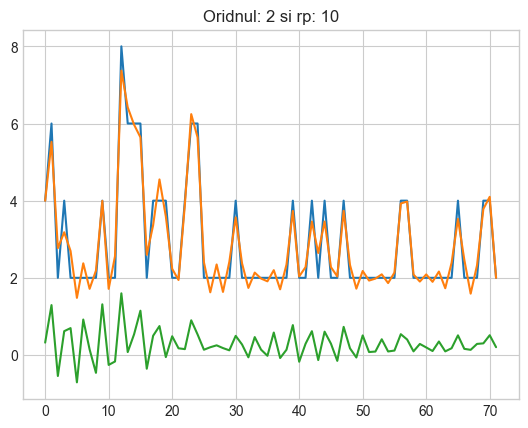

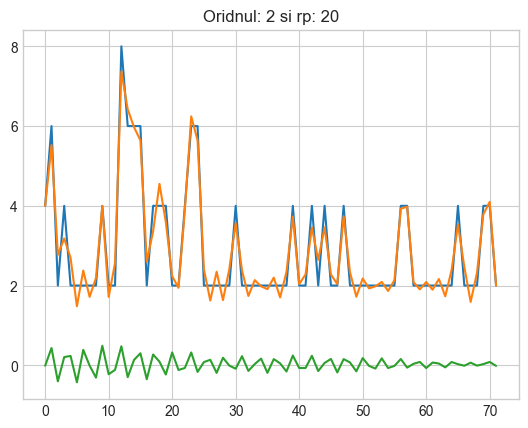

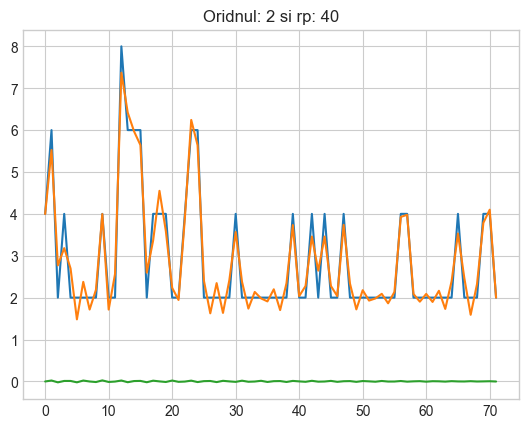

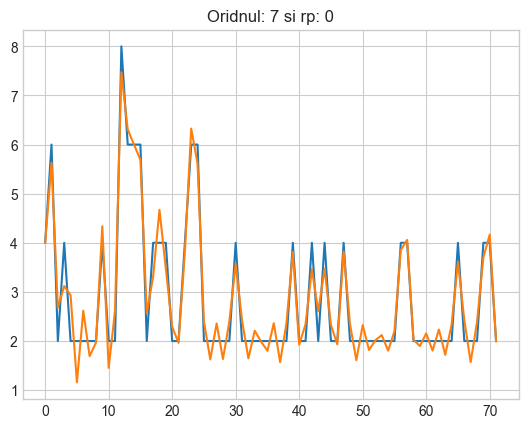

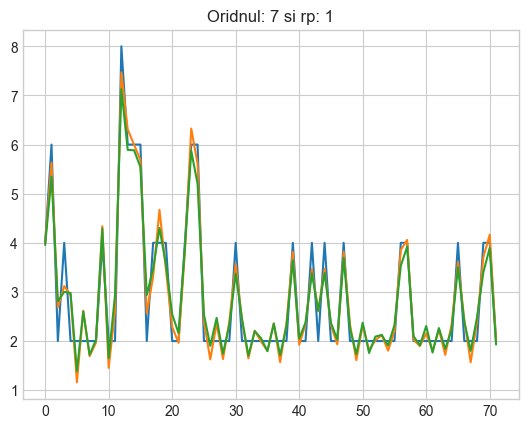

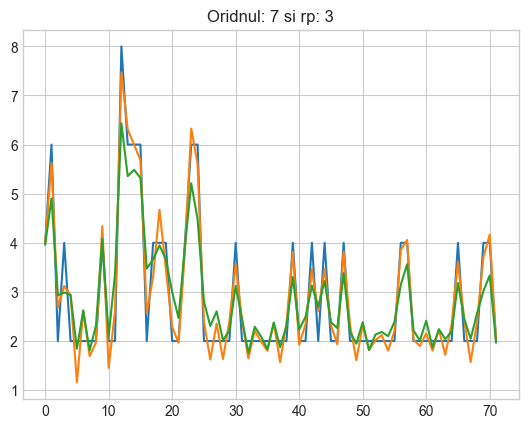

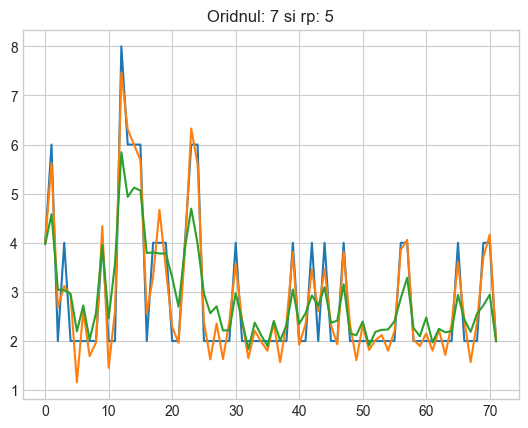

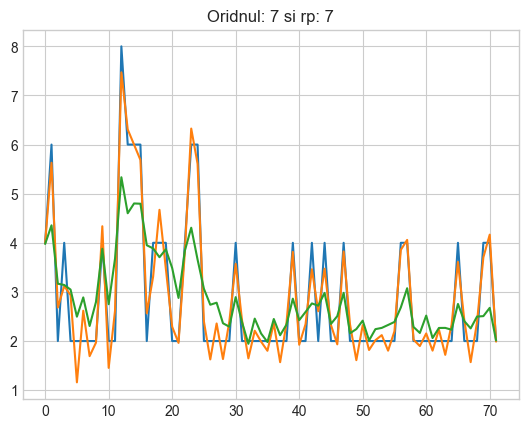

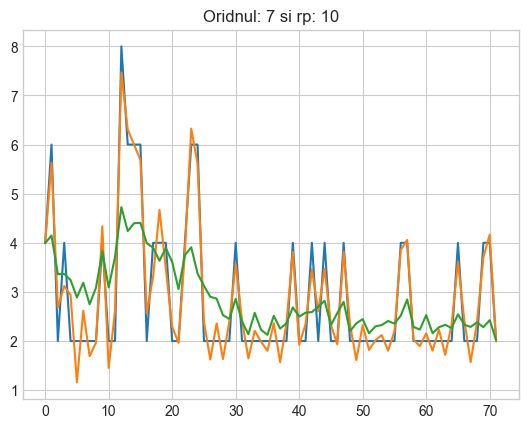

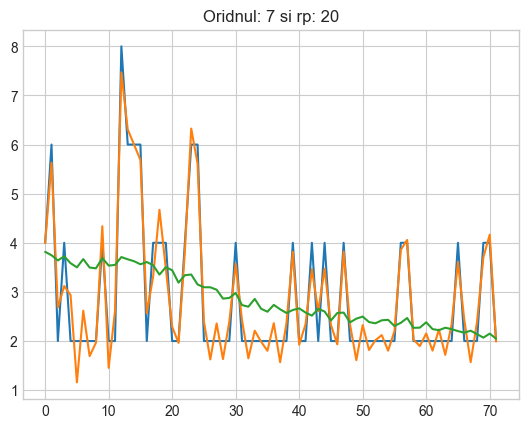

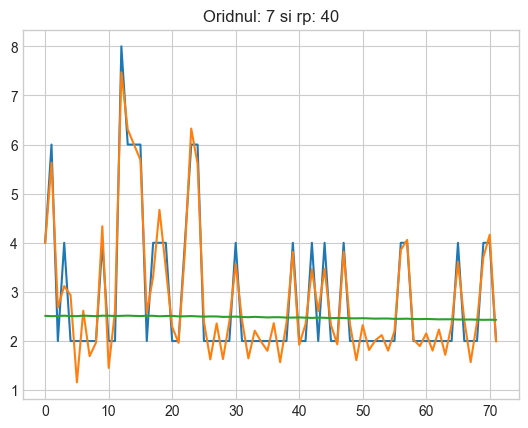

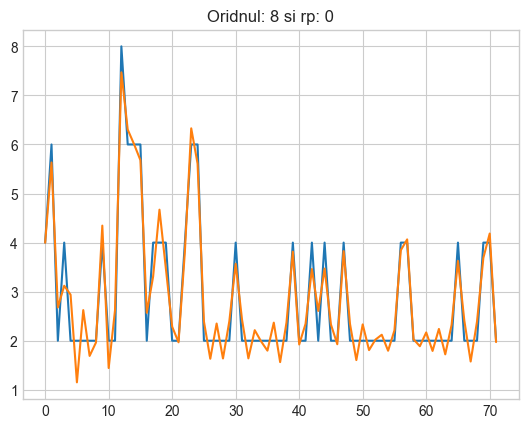

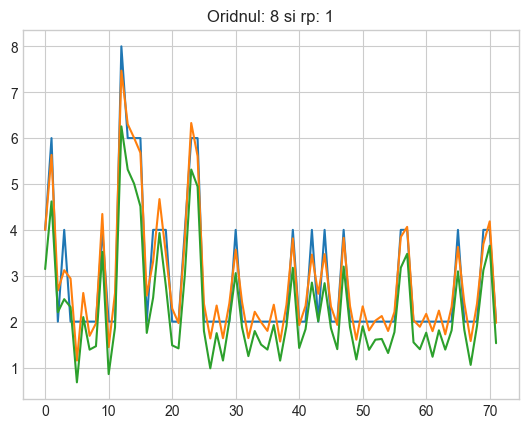

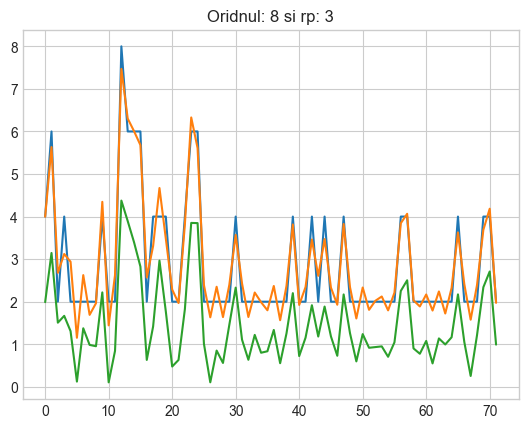

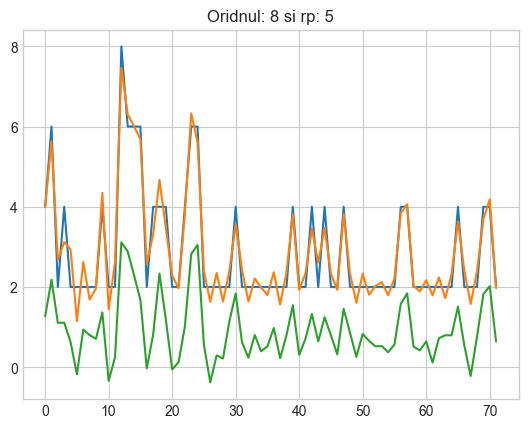

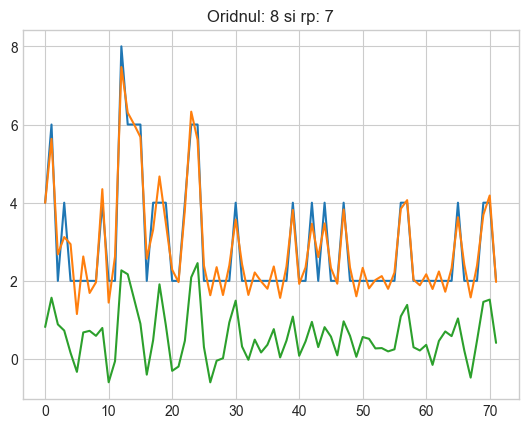

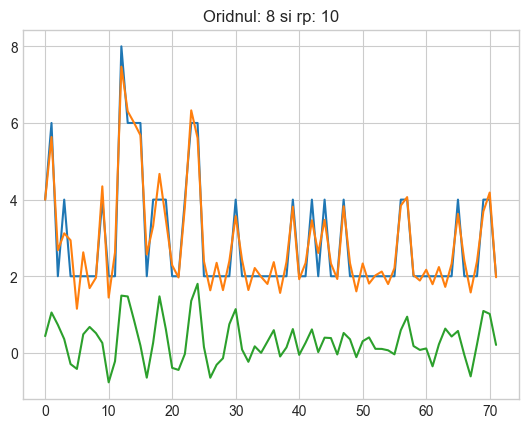

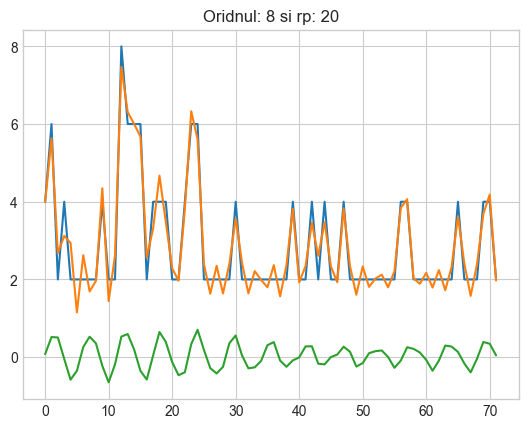

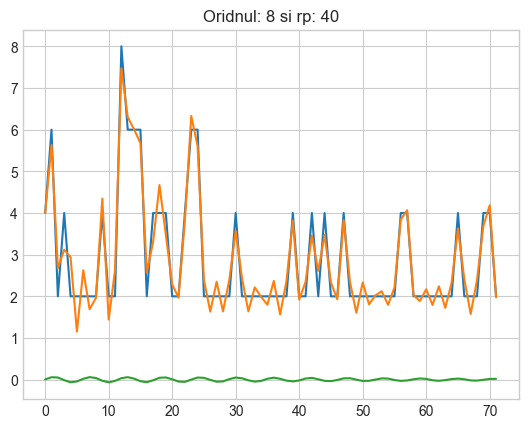

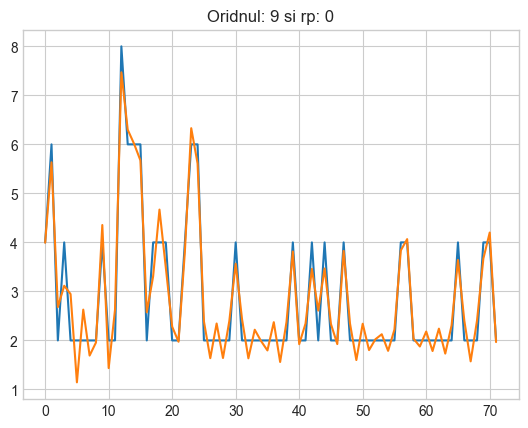

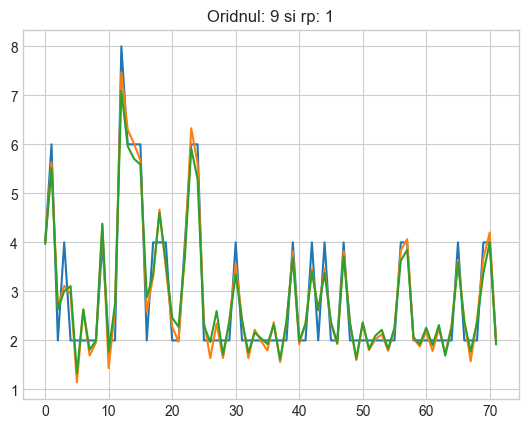

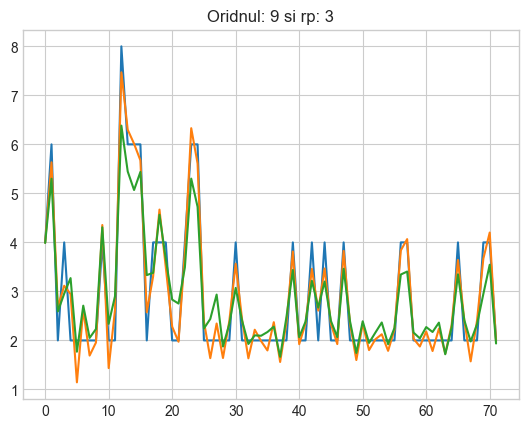

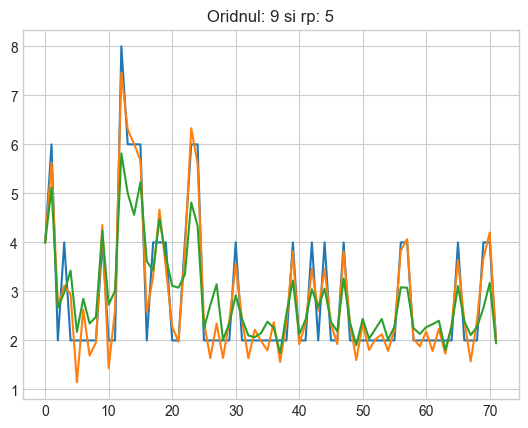

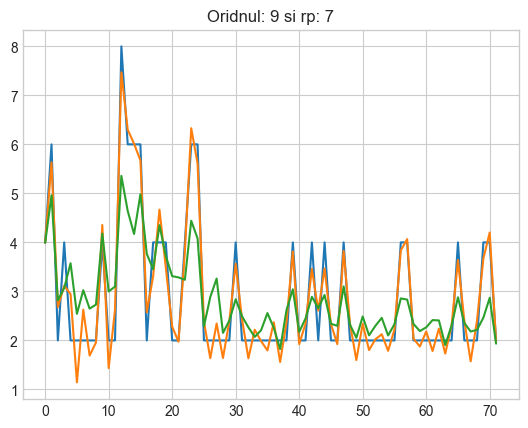

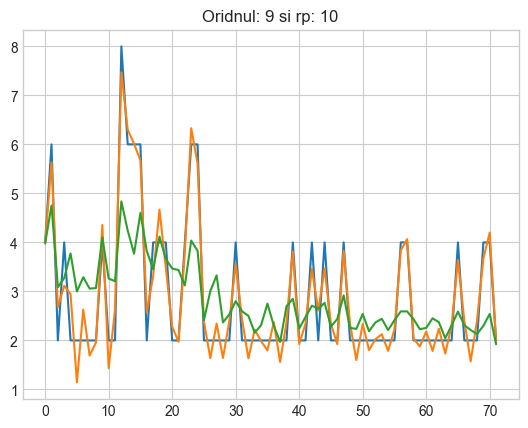

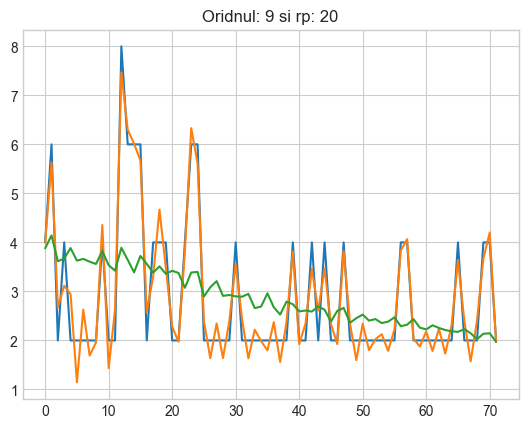

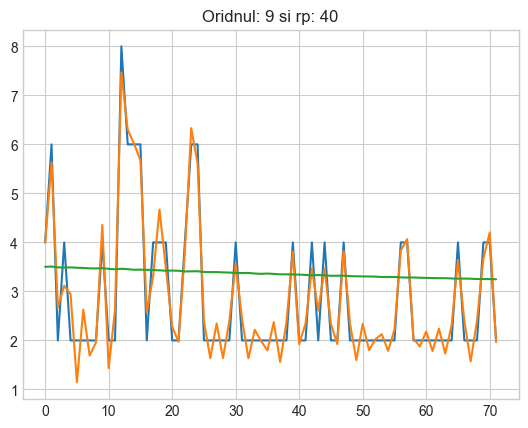

In [75]:

for N in [1, 2, 7, 8, 9]:
    for rp in [0, 1, 3, 5, 7, 10, 20, 40]:
        b_butter, a_butter = sig.butter(N, normal_cutoff, btype='low', analog=False)
        b_cheby, a_cheby = sig.cheby1(N, rp=rp, Wn=normal_cutoff, btype='low', analog=False)

        x_butter = sig.filtfilt(b_butter, a_butter, x)
        x_cheby = sig.filtfilt(b_cheby, a_cheby, x)

        plt.title(f'Oridnul: {N} si rp: {rp}')

        plt.plot(x)
        plt.plot(x_butter)
        plt.plot(x_cheby)

        plt.show()